In [9]:
import imutils
import numpy as np
import cv2
from PIL import Image
from IPython.display import display, Javascript
import time


# Face Segmentation

In [10]:
#!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt#
#!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

In [11]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [12]:
cap = cv2.VideoCapture(4)
time1 = time.time()
images_list = []

while True:
    success, img = cap.read()
    (h, w) = img.shape[:2]
    
        
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    if time.time() - time1 > 3:
        time1 = time.time()
            
        for i in range(0, detections.shape[2]):
            # extract the confidence (i.e., probability) associated with the prediction
            confidence = detections[0, 0, i, 2]

            # filter out weak detections by ensuring the `confidence` is
            # greater than the minimum confidence threshold
            if confidence > 0.5:
                # compute the (x, y)-coordinates of the bounding box for the object
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")
                # draw the bounding box of the face along with the associated probability
                text = "{:.2f}%".format(confidence * 100)
                y = startY - 10 if startY - 10 > 10 else startY + 10
                cropped = img[startY:endY,startX:endX]
                cropped_color = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

                images_list.append(cropped_color)
                cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)
                cv2.putText(img, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    cv2.imshow('frame', img)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
print(len(images_list))

7


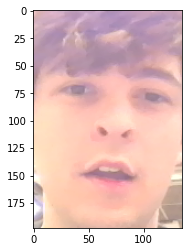

In [20]:
#imgggg = Image.fromarray(img)
plt.imshow(images_list[0])
#imgggg.show()

# Face Recognition

In [ ]:
#from deepface import DeepFace


In [ ]:
#DeepFace.stream(db_path="db")

## Face Recognition

[Tutorial](https://github.com/serengil/tensorflow-101/blob/master/python/vgg-face.ipynb)

In [13]:
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.utils import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt

2022-10-27 08:55:19.908211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 08:55:20.017424: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-27 08:55:20.020464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/loe/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-27 08:55:20.020474: I ten

In [14]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

2022-10-27 08:55:21.194289: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/loe/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-27 08:55:21.194309: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-27 08:55:21.194326: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-10-27 08:55:21.194543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
from keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

In [16]:
def preprocess_image(image):
    if image.shape[0] != 224:
        img = Image.fromarray(image)
        #img.show()
        img = img.resize((224,224))        
        img = img_to_array(img)
        #cv2.imshow("frame", img)
        
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [17]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [18]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)


In [21]:
epsilon = 0.30

def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image((img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image((img2)))[0,:]
    
    print(img1_representation)
    
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
    
    print("Cosine similarity: ",cosine_similarity)
    print("Euclidean distance: ",euclidean_distance)
    
    if(cosine_similarity < epsilon):
        print("verified... they are same person")
    else:
        print("unverified! they are not same person!")
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(img1)
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(img2)
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")

1/1 [==============================] - 0s 328ms/step
[ 2.7639682   0.32569218  0.8099931  ... -1.9520488  -0.2394105
  2.1566389 ]
Cosine similarity:  0.0
Euclidean distance:  0.0
verified... they are same person


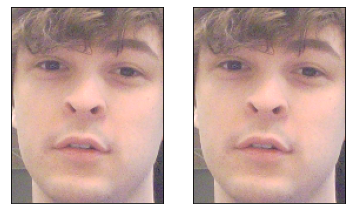

-----------------------------------------
1/1 [==============================] - 0s 327ms/step
[ 2.7639682   0.32569218  0.8099931  ... -1.9520488  -0.2394105
  2.1566389 ]
Cosine similarity:  0.4719380736351013
Euclidean distance:  75.72561
unverified! they are not same person!


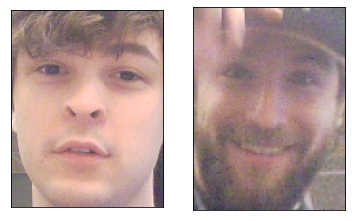

-----------------------------------------
1/1 [==============================] - 0s 306ms/step
[ 2.7639682   0.32569218  0.8099931  ... -1.9520488  -0.2394105
  2.1566389 ]
Cosine similarity:  0.4148009419441223
Euclidean distance:  73.66771
unverified! they are not same person!


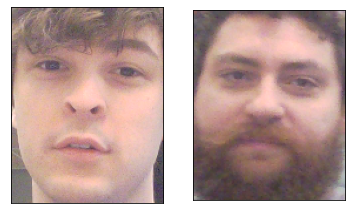

-----------------------------------------
1/1 [==============================] - 0s 311ms/step
[ 2.7639682   0.32569218  0.8099931  ... -1.9520488  -0.2394105
  2.1566389 ]
Cosine similarity:  0.09939420223236084
Euclidean distance:  39.864204
verified... they are same person


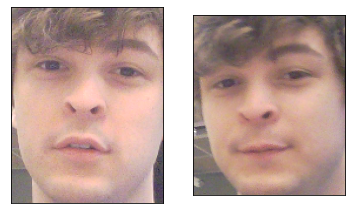

-----------------------------------------
1/1 [==============================] - 0s 313ms/step
[ 2.7639682   0.32569218  0.8099931  ... -1.9520488  -0.2394105
  2.1566389 ]
Cosine similarity:  0.41542553901672363
Euclidean distance:  65.65971
unverified! they are not same person!


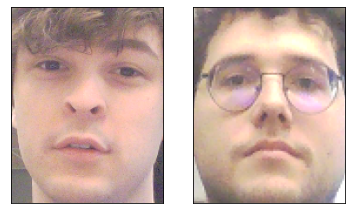

-----------------------------------------
1/1 [==============================] - 0s 289ms/step
[ 2.7639682   0.32569218  0.8099931  ... -1.9520488  -0.2394105
  2.1566389 ]
Cosine similarity:  0.1768774390220642
Euclidean distance:  43.723602
verified... they are same person


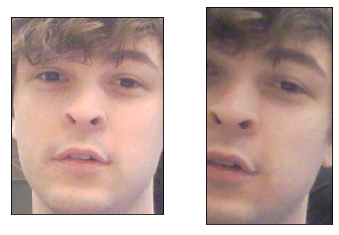

-----------------------------------------
1/1 [==============================] - 0s 294ms/step
[ 2.7639682   0.32569218  0.8099931  ... -1.9520488  -0.2394105
  2.1566389 ]
Cosine similarity:  0.45606374740600586
Euclidean distance:  83.434875
unverified! they are not same person!


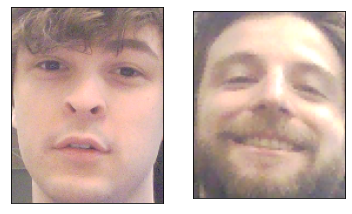

-----------------------------------------
1/1 [==============================] - 0s 292ms/step
[ 2.6995623  -0.14729498  0.96361125 ... -2.0000737  -1.1778014
  1.0918664 ]
Cosine similarity:  0.4719380736351013
Euclidean distance:  75.72561
unverified! they are not same person!


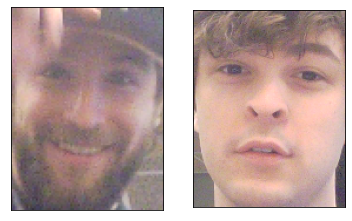

-----------------------------------------
1/1 [==============================] - 0s 300ms/step
[ 2.6995623  -0.14729498  0.96361125 ... -2.0000737  -1.1778014
  1.0918664 ]
Cosine similarity:  5.960464477539063e-08
Euclidean distance:  0.0
verified... they are same person


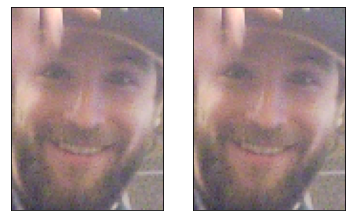

-----------------------------------------
1/1 [==============================] - 0s 309ms/step
[ 2.6995623  -0.14729498  0.96361125 ... -2.0000737  -1.1778014
  1.0918664 ]
Cosine similarity:  0.3340340852737427
Euclidean distance:  66.80336
unverified! they are not same person!


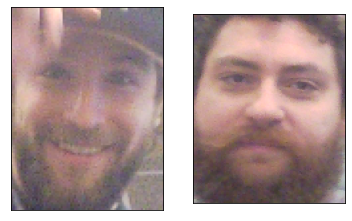

-----------------------------------------
1/1 [==============================] - 0s 314ms/step
[ 2.6995623  -0.14729498  0.96361125 ... -2.0000737  -1.1778014
  1.0918664 ]
Cosine similarity:  0.4482417106628418
Euclidean distance:  81.12595
unverified! they are not same person!


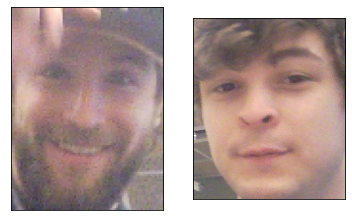

-----------------------------------------
1/1 [==============================] - 0s 295ms/step
[ 2.6995623  -0.14729498  0.96361125 ... -2.0000737  -1.1778014
  1.0918664 ]
Cosine similarity:  0.43480515480041504
Euclidean distance:  68.26804
unverified! they are not same person!


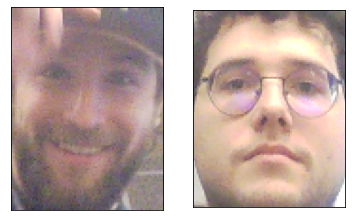

-----------------------------------------
1/1 [==============================] - 0s 317ms/step
[ 2.6995623  -0.14729498  0.96361125 ... -2.0000737  -1.1778014
  1.0918664 ]
Cosine similarity:  0.43947070837020874
Euclidean distance:  67.84867
unverified! they are not same person!


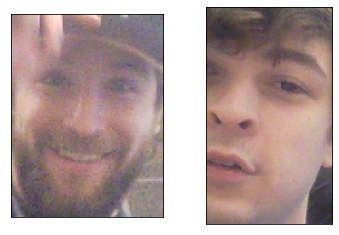

-----------------------------------------
1/1 [==============================] - 0s 275ms/step
[ 2.6995623  -0.14729498  0.96361125 ... -2.0000737  -1.1778014
  1.0918664 ]
Cosine similarity:  0.3268241882324219
Euclidean distance:  71.62991
unverified! they are not same person!


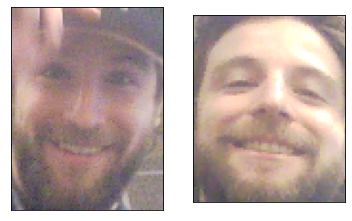

-----------------------------------------
1/1 [==============================] - 0s 278ms/step
[ 3.22421     0.37621334  1.5481447  ... -2.4678433   0.412578
  1.6162062 ]
Cosine similarity:  0.4148009419441223
Euclidean distance:  73.66771
unverified! they are not same person!


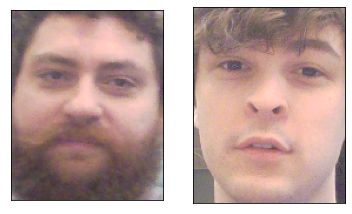

-----------------------------------------
1/1 [==============================] - 0s 308ms/step
[ 3.22421     0.37621334  1.5481447  ... -2.4678433   0.412578
  1.6162062 ]
Cosine similarity:  0.3340340852737427
Euclidean distance:  66.80336
unverified! they are not same person!


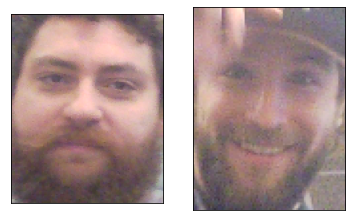

-----------------------------------------
1/1 [==============================] - 0s 296ms/step
[ 3.22421     0.37621334  1.5481447  ... -2.4678433   0.412578
  1.6162062 ]
Cosine similarity:  1.7881393432617188e-07
Euclidean distance:  0.0
verified... they are same person


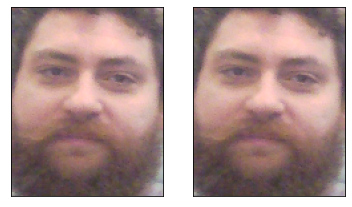

-----------------------------------------
1/1 [==============================] - 0s 297ms/step
[ 3.22421     0.37621334  1.5481447  ... -2.4678433   0.412578
  1.6162062 ]
Cosine similarity:  0.3679138422012329
Euclidean distance:  75.38322
unverified! they are not same person!


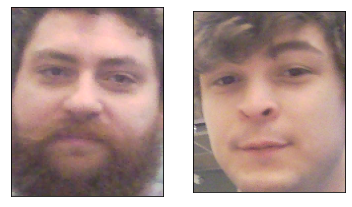

-----------------------------------------
1/1 [==============================] - 0s 313ms/step
[ 3.22421     0.37621334  1.5481447  ... -2.4678433   0.412578
  1.6162062 ]
Cosine similarity:  0.3454657196998596
Euclidean distance:  64.43801
unverified! they are not same person!


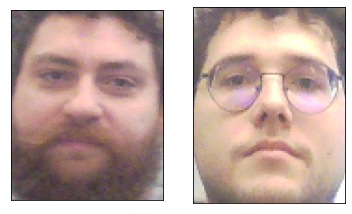

-----------------------------------------
1/1 [==============================] - 0s 305ms/step
[ 3.22421     0.37621334  1.5481447  ... -2.4678433   0.412578
  1.6162062 ]
Cosine similarity:  0.36558836698532104
Euclidean distance:  65.705185
unverified! they are not same person!


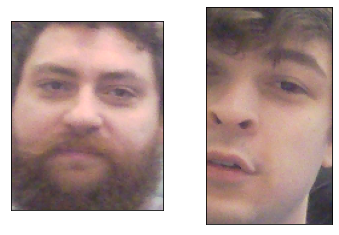

-----------------------------------------
1/1 [==============================] - 0s 317ms/step
[ 3.22421     0.37621334  1.5481447  ... -2.4678433   0.412578
  1.6162062 ]
Cosine similarity:  0.3194735646247864
Euclidean distance:  72.1256
unverified! they are not same person!


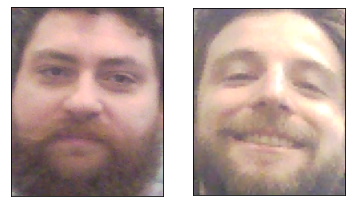

-----------------------------------------
1/1 [==============================] - 0s 314ms/step
[ 3.4291322  -0.71519697  0.9816346  ... -2.5624852   0.44483048
  2.818782  ]
Cosine similarity:  0.09939420223236084
Euclidean distance:  39.864204
verified... they are same person


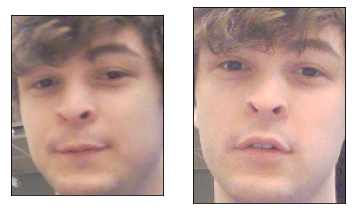

-----------------------------------------
1/1 [==============================] - 0s 297ms/step
[ 3.4291322  -0.71519697  0.9816346  ... -2.5624852   0.44483048
  2.818782  ]
Cosine similarity:  0.4482417106628418
Euclidean distance:  81.12595
unverified! they are not same person!


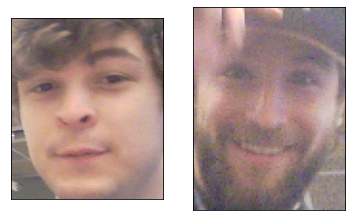

-----------------------------------------
1/1 [==============================] - 0s 297ms/step
[ 3.4291322  -0.71519697  0.9816346  ... -2.5624852   0.44483048
  2.818782  ]
Cosine similarity:  0.3679138422012329
Euclidean distance:  75.38322
unverified! they are not same person!


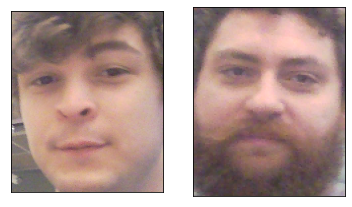

-----------------------------------------
1/1 [==============================] - 0s 303ms/step
[ 3.4291322  -0.71519697  0.9816346  ... -2.5624852   0.44483048
  2.818782  ]
Cosine similarity:  0.0
Euclidean distance:  0.0
verified... they are same person


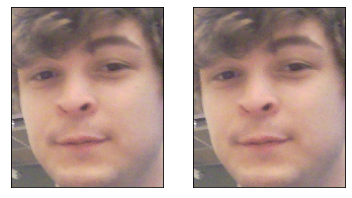

-----------------------------------------
1/1 [==============================] - 0s 317ms/step
[ 3.4291322  -0.71519697  0.9816346  ... -2.5624852   0.44483048
  2.818782  ]
Cosine similarity:  0.47734618186950684
Euclidean distance:  79.573746
unverified! they are not same person!


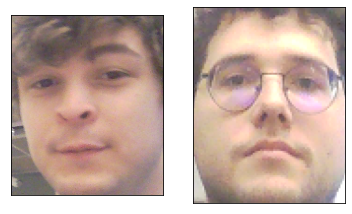

-----------------------------------------
1/1 [==============================] - 0s 308ms/step
[ 3.4291322  -0.71519697  0.9816346  ... -2.5624852   0.44483048
  2.818782  ]
Cosine similarity:  0.1762101650238037
Euclidean distance:  53.054253
verified... they are same person


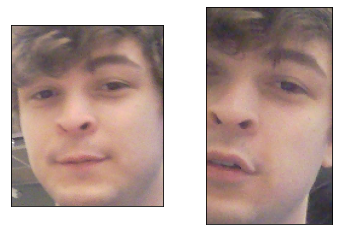

-----------------------------------------
1/1 [==============================] - 0s 292ms/step
[ 3.4291322  -0.71519697  0.9816346  ... -2.5624852   0.44483048
  2.818782  ]
Cosine similarity:  0.40989482402801514
Euclidean distance:  84.12364
unverified! they are not same person!


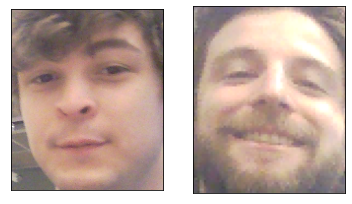

-----------------------------------------
1/1 [==============================] - 0s 314ms/step
[ 2.202168   -0.07236199 -0.6560154  ... -0.32164127  0.81299293
  1.8424712 ]
Cosine similarity:  0.41542553901672363
Euclidean distance:  65.65971
unverified! they are not same person!


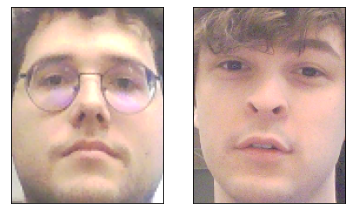

-----------------------------------------
1/1 [==============================] - 0s 313ms/step
[ 2.202168   -0.07236199 -0.6560154  ... -0.32164127  0.81299293
  1.8424712 ]
Cosine similarity:  0.43480515480041504
Euclidean distance:  68.26804
unverified! they are not same person!


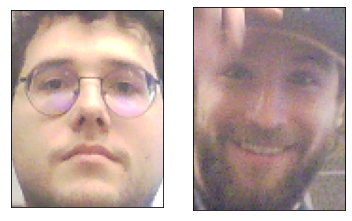

-----------------------------------------
1/1 [==============================] - 0s 315ms/step
[ 2.202168   -0.07236199 -0.6560154  ... -0.32164127  0.81299293
  1.8424712 ]
Cosine similarity:  0.3454657196998596
Euclidean distance:  64.43801
unverified! they are not same person!


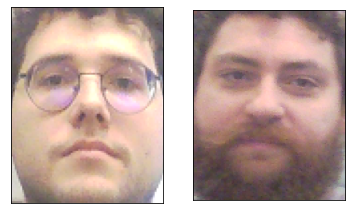

-----------------------------------------
1/1 [==============================] - 0s 318ms/step
[ 2.202168   -0.07236199 -0.6560154  ... -0.32164127  0.81299293
  1.8424712 ]
Cosine similarity:  0.47734618186950684
Euclidean distance:  79.573746
unverified! they are not same person!


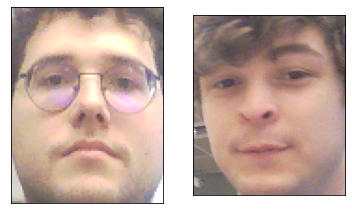

-----------------------------------------
1/1 [==============================] - 0s 305ms/step
[ 2.202168   -0.07236199 -0.6560154  ... -0.32164127  0.81299293
  1.8424712 ]
Cosine similarity:  -1.1920928955078125e-07
Euclidean distance:  0.0
verified... they are same person


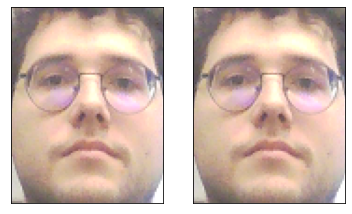

-----------------------------------------
1/1 [==============================] - 0s 295ms/step
[ 2.202168   -0.07236199 -0.6560154  ... -0.32164127  0.81299293
  1.8424712 ]
Cosine similarity:  0.31865644454956055
Euclidean distance:  51.083626
unverified! they are not same person!


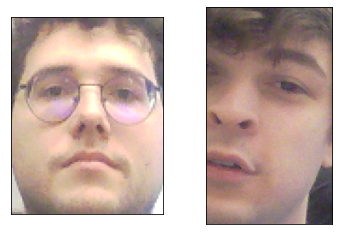

-----------------------------------------
1/1 [==============================] - 0s 310ms/step
[ 2.202168   -0.07236199 -0.6560154  ... -0.32164127  0.81299293
  1.8424712 ]
Cosine similarity:  0.41802746057510376
Euclidean distance:  77.65947
unverified! they are not same person!


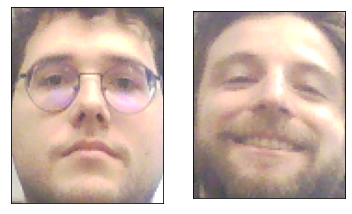

-----------------------------------------
1/1 [==============================] - 0s 315ms/step
[ 1.4470711   1.0355625   0.46214643 ... -1.5583032   0.80381685
  2.6563513 ]
Cosine similarity:  0.1768774390220642
Euclidean distance:  43.723602
verified... they are same person


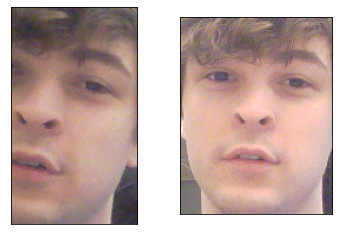

-----------------------------------------
1/1 [==============================] - 0s 314ms/step
[ 1.4470711   1.0355625   0.46214643 ... -1.5583032   0.80381685
  2.6563513 ]
Cosine similarity:  0.43947070837020874
Euclidean distance:  67.84867
unverified! they are not same person!


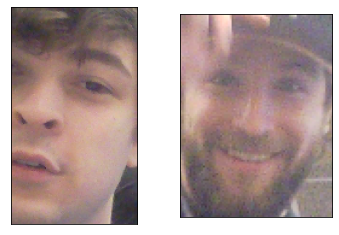

-----------------------------------------
1/1 [==============================] - 0s 309ms/step
[ 1.4470711   1.0355625   0.46214643 ... -1.5583032   0.80381685
  2.6563513 ]
Cosine similarity:  0.36558836698532104
Euclidean distance:  65.705185
unverified! they are not same person!


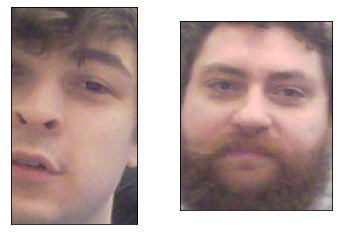

-----------------------------------------
1/1 [==============================] - 0s 308ms/step
[ 1.4470711   1.0355625   0.46214643 ... -1.5583032   0.80381685
  2.6563513 ]
Cosine similarity:  0.1762101650238037
Euclidean distance:  53.054253
verified... they are same person


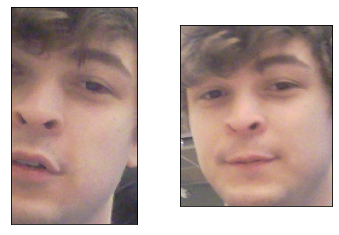

-----------------------------------------
1/1 [==============================] - 0s 299ms/step
[ 1.4470711   1.0355625   0.46214643 ... -1.5583032   0.80381685
  2.6563513 ]
Cosine similarity:  0.31865644454956055
Euclidean distance:  51.083626
unverified! they are not same person!


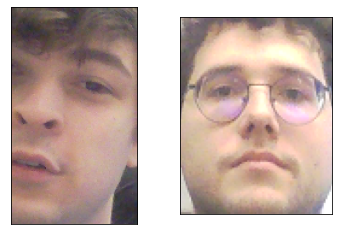

-----------------------------------------
1/1 [==============================] - 0s 311ms/step
[ 1.4470711   1.0355625   0.46214643 ... -1.5583032   0.80381685
  2.6563513 ]
Cosine similarity:  5.960464477539063e-08
Euclidean distance:  0.0
verified... they are same person


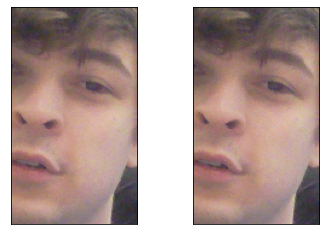

-----------------------------------------
1/1 [==============================] - 0s 307ms/step
[ 1.4470711   1.0355625   0.46214643 ... -1.5583032   0.80381685
  2.6563513 ]
Cosine similarity:  0.4317174553871155
Euclidean distance:  78.39779
unverified! they are not same person!


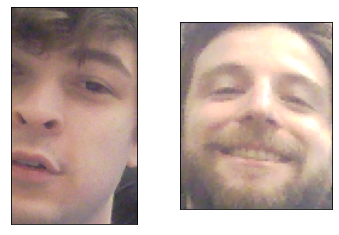

-----------------------------------------
1/1 [==============================] - 0s 307ms/step
[ 3.2677128  0.2254405  2.4556696 ... -2.032387   2.431241   1.535265 ]
Cosine similarity:  0.45606374740600586
Euclidean distance:  83.434875
unverified! they are not same person!


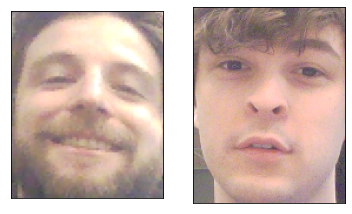

-----------------------------------------
1/1 [==============================] - 0s 311ms/step
[ 3.2677128  0.2254405  2.4556696 ... -2.032387   2.431241   1.535265 ]
Cosine similarity:  0.3268241882324219
Euclidean distance:  71.62991
unverified! they are not same person!


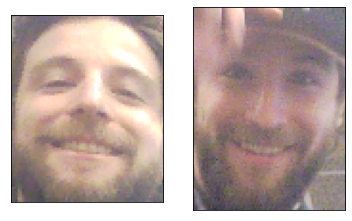

-----------------------------------------
1/1 [==============================] - 0s 308ms/step
[ 3.2677128  0.2254405  2.4556696 ... -2.032387   2.431241   1.535265 ]
Cosine similarity:  0.3194735646247864
Euclidean distance:  72.1256
unverified! they are not same person!


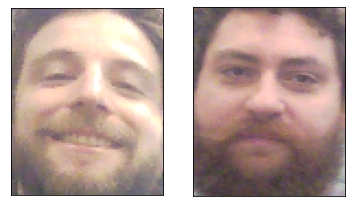

-----------------------------------------
1/1 [==============================] - 0s 306ms/step
[ 3.2677128  0.2254405  2.4556696 ... -2.032387   2.431241   1.535265 ]
Cosine similarity:  0.40989482402801514
Euclidean distance:  84.12364
unverified! they are not same person!


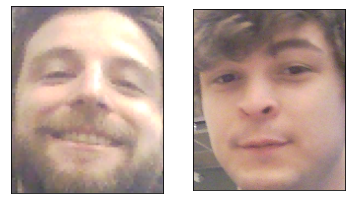

-----------------------------------------
1/1 [==============================] - 0s 303ms/step
[ 3.2677128  0.2254405  2.4556696 ... -2.032387   2.431241   1.535265 ]
Cosine similarity:  0.41802746057510376
Euclidean distance:  77.65947
unverified! they are not same person!


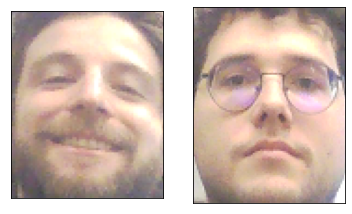

-----------------------------------------
1/1 [==============================] - 0s 324ms/step
[ 3.2677128  0.2254405  2.4556696 ... -2.032387   2.431241   1.535265 ]
Cosine similarity:  0.4317174553871155
Euclidean distance:  78.39779
unverified! they are not same person!


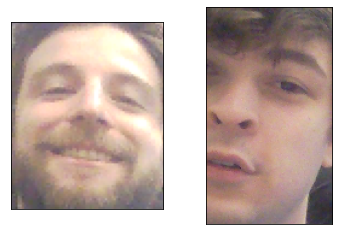

-----------------------------------------
1/1 [==============================] - 0s 304ms/step
[ 3.2677128  0.2254405  2.4556696 ... -2.032387   2.431241   1.535265 ]
Cosine similarity:  -1.1920928955078125e-07
Euclidean distance:  0.0
verified... they are same person


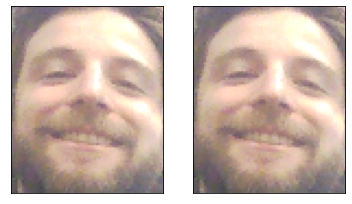

-----------------------------------------


In [22]:
for face in images_list:
    for face2 in images_list:
        verifyFace(face, face2)